In [1]:
import numpy as np
import pandas as pd
import discretize
import matplotlib.pyplot as plt

from simpeg.electromagnetics import time_domain as tdem

In [2]:
station_locs = pd.read_csv("StationLocations_NAD83.csv", skiprows=5)
station_locs.head()

,Station,Easting,Northing,Comp,Elev_ASTER
0,100,420425,5589298,TX,773
1,200,420425,5589298,TX,773
2,300,420505,5589301,TX,774
3,301,420489,5589300,TX,773
4,302,420490,5589300,TX,773


In [3]:
comps = np.unique(station_locs["Comp"])
comps

array(['Ex1', 'Ex2', 'Ey1', 'Ey2', 'Hx1', 'Hx2', 'Hy1', 'Hy2', 'TX',
       'ZEN'], dtype=object)

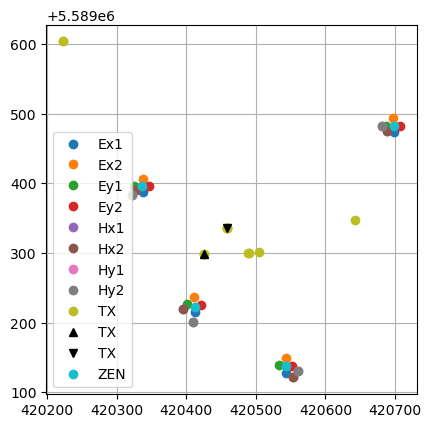

In [4]:
fig, ax = plt.subplots(1, 1) 

for i, c in enumerate(comps): 
    inds = station_locs["Comp"] == c
    ax.plot(
        station_locs[inds]["Easting"], station_locs[inds]["Northing"], f"C{i}o",
        label=c
    )
    if c == "TX": 
        tx100 = station_locs["Station"] == 100
        ax.plot(
            station_locs[tx100]["Easting"], station_locs[tx100]["Northing"], f"k^",
            label=c
        )
        tx400 = station_locs["Station"] == 400
        ax.plot(
            station_locs[tx400]["Easting"], station_locs[tx400]["Northing"], f"kv",
            label=c
        )
    
    ax.legend()

ax.grid()
ax.set_aspect(1)

In [5]:
tx100 = station_locs[station_locs["Station"] == 100]
tx400 = station_locs[station_locs["Station"] == 400]

In [6]:
np.sqrt((tx400["Easting"].values - tx100["Easting"].values)**2 + (tx400["Northing"].values - tx100["Northing"].values)**2)

array([50.99019514])

In [40]:
# add injector well to data_frame. It is 20m from TX100 in same line as TX400
dx = (tx400["Easting"].values - tx100["Easting"].values)
dy = (tx400["Northing"].values - tx100["Northing"].values)

theta = np.atan(dy/dx)

distance = 20
well_x = np.round(tx100["Easting"].values + distance * np.cos(theta))
well_y = np.round(tx100["Northing"].values + distance * np.sin(theta))



In [41]:
station_locs.head()

,Station,Easting,Northing,Comp,Elev_ASTER
0,100,420425,5589298,TX,773
1,200,420425,5589298,TX,773
2,300,420505,5589301,TX,774
3,301,420489,5589300,TX,773
4,302,420490,5589300,TX,773


In [42]:
tx100["Elev_ASTER"].values[0] 

np.int64(773)

In [50]:
stations = pd.concat([
    station_locs,
    pd.DataFrame(
        {
            "Station": 1000,
            "Easting": well_x,
            "Northing": well_y, 
            "Comp":"INJ",
            "Elev_ASTER": tx100["Elev_ASTER"].values
        }
    ),
], ignore_index=True)

In [51]:
stations.head

<bound method NDFrame.head of     Station   Easting   Northing Comp  Elev_ASTER
0       100  420425.0  5589298.0   TX         773
1       200  420425.0  5589298.0   TX         773
2       300  420505.0  5589301.0   TX         774
3       301  420489.0  5589300.0   TX         773
4       302  420490.0  5589300.0   TX         773
5       400  420459.0  5589336.0   TX         774
6       401  420459.0  5589336.0   TX         774
7       402  420223.0  5589604.0   TX         772
8       500  420459.0  5589336.0   TX         774
9       501  420643.0  5589348.0   TX         770
10      502  420223.0  5589604.0   TX         772
11        1  420698.0  5589474.0  Ex1         774
12        1  420687.0  5589483.0  Ey1         775
13        1  420688.0  5589475.0  Hx1         775
14        1  420681.0  5589482.0  Hy1         776
15        1  420697.0  5589494.0  Ex2         775
16        1  420707.0  5589482.0  Ey2         773
17        1  420688.0  5589475.0  Hx2         775
18        1  420681.

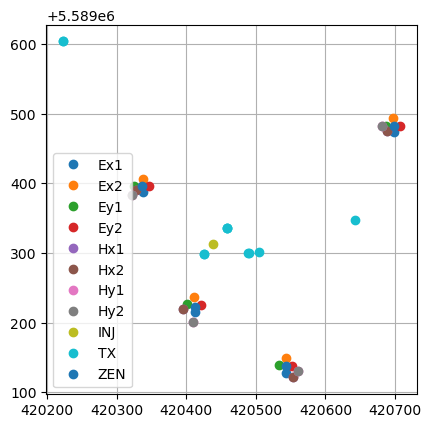

In [53]:
fig, ax = plt.subplots(1, 1) 

for i, c in enumerate(np.unique(stations["Comp"])): 
    inds = stations["Comp"] == c
    ax.plot(
        stations[inds]["Easting"], stations[inds]["Northing"], f"C{i}o",
        label=c
    )
    # if c == "TX": 
    #     tx100 = station_locs["Station"] == 100
    #     ax.plot(
    #         station_locs[tx100]["Easting"], station_locs[tx100]["Northing"], f"k^",
    #         label=c
    #     )
    #     tx400 = station_locs["Station"] == 400
    #     ax.plot(
    #         station_locs[tx400]["Easting"], station_locs[tx400]["Northing"], f"kv",
    #         label=c
    #     )
    
    ax.legend()

ax.grid()
ax.set_aspect(1)